#cache Simulator

###Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Direct Mapping For Instruction Cache 

In [ ]:
import math
def hextoBin(hex): #for 32 bit address
    """
    :param hex: type string
    :return: binary number of type string
    """
    if hex[:2] == "0x":
        return bin(int(hex, 0))[2:].zfill(32)
    else:
        return bin(int(hex, 16))[2:].zfill(32)

def DMCACHE(lines,cache_size,block_size):                                       
                                                                    
    count = 0
    hit = 0
    miss = 0
    compulsory_miss = 0
    
    cache_size = cache_size #KB
    Block_size = block_size #

    associativiy=1 #DM way
    word_size = 32 #bits
    sets=int(cache_size*1024/(Block_size*4*associativiy))
    index_size = int(math.log2(sets))
    offset_size=int(math.log2(Block_size))
    tag_size=word_size-index_size-offset_size
    cache_index=int(2**index_size)
    
    cache = ['0'] * cache_index #Cache is created as list here, initially,first  0 as the valid bit, and there is nothing stored in tag bits

    #Total cache memory is 256KB, and each block is 4B, so there are 65536 set=cachesize/block in the cache

    for line in lines:                                               

        count += 1 # for calcualtion hit rate and miss rate                                          

        line = line.rstrip('\n') #Each line contains a newline character at the end, so we remove that using rstrip
        line = line.split(" ")   #Now, we split the line by spaces and now it is stored as a list
                                 #Example of the list - ["l", "0x1fffff90", "2"]
        address = line[1]         
        address_bits = hextoBin(address) #conversion and since Last two bits in the 32 bits is the byte-offset 

        index_bits = address_bits[word_size-offset_size-index_size:word_size-offset_size]    #Now since the number of sets in the cache is 16384 = 2^14, so the index bit becomes 14 bits wide
        tag_bits = address_bits[word_size-offset_size-index_size-tag_size:word_size-index_size-offset_size] #And the remaining bits, i.e., 16 bits becomes the tag bits
        index = int(index_bits,2) 
         
        index = int(index_bits,2)        #index bits to its decimal equivalent 
        if(0 <= index < cache_index):     #We make sure that the index bit lies in the range [0, 65536)
            if(cache[index][0] == '0'):    #We check if the valid bit is equal to 0
                cache[index] = "1" + tag_bits #We store tag bit in that position, make the valid bit 1, and increase the miss rate of the cache by one
                miss = miss + 1
            elif(cache[index][0] == '1'):                            #If the valid bit is equal to 1 
                if(cache[index][1:] == tag_bits):                    #We go to that particular index in the cache memory(here a list) and check if the value stored over there is equal to tag bits or not
                    hit = hit + 1                                    #If it is, then we increase the hit rate of the cache by one 
                else:        
                    cache[index] = "1" + tag_bits                    #Else, we store tag bit in that position and increase the miss rate of the cache by one
                    miss = miss + 1
    return hit, miss, compulsory_miss, hit/count, miss/count, count                                                

if __name__ == '__main__':
    print("hold on! guys its running, the  trace file is little big..........")
    getfile = open('/content/drive/MyDrive/traces /SIMPLE1.PRG')
    lines = getfile.readlines()
    zero = [] #for information fetech (read access)
    #two_three = [] # read access and write access

    for i in range(len(lines)):
        if lines[i][0] == '0':
            zero.append(lines[i])
        #if lines[i][0] == '2' or lines[i][0] == '3':
            #two_three.append(lines[i])
    cache_size_array = [2,4,8,16,32,64,128,512,1024]
    block_size_array = [1]
    instruction_hit = []
    instruction_miss = []
    instruction_compulsory_miss = []
    instruction_miss_rate = []
    hit_rate = []
    instruction_cache_access = []
    for c in cache_size_array:
        for b in block_size_array:
            hit0, miss0, compulsory_miss0, hitrate0, missrate0, count0  = DMCACHE(zero,c,b)
            instruction_hit.append(hit0)
            instruction_miss.append(miss0)
            instruction_compulsory_miss.append(compulsory_miss0)
            instruction_miss_rate.append(missrate0)
            hit_rate.append(hitrate0)
            instruction_cache_access.append(count0)
            """
            print('*'*50)
            print("cache size : {}".format(c),end=' ')
            print("Block size : {}".format(b))
            print("hits : ", hit0)
            print("misses : ", miss0)
            print("Cache access : ", count0)
            print('*'*50)"""


    getfile.close()
    #two_three = ['2 00000001\n' , '3 00000011\n', '2 000000101\n', '2 00000011']
    #print("Running simulator now!...")
    #hit23, miss23, compulsory_miss23, hitrate, missrate, count23 ,count_read23 , count_write23 = DMCACHE(two_three)
    #j = 0
    #z = 0
    """
    for i in range(len(cache_size_array)*len(block_size_array)):


        if z == 3:
            j=j+1
            z=0

        print('*'*50)
        print("cache size : {}".format(cache_size_array[j]),end=' ')
        print("Block size : {}".format(block_size_array[z]))
        print("hits : ", hit[i])
        print("misses : ", miss[i])
        print("Hit rate : ", hit_rate[i])
        print("Miss rate : ", miss_rate[i])
        print("Cache access : ", cache_access[i])
        print("Number of read access : ",read_access[i])
        print("Number of write access : ",write_access[i])
        print('Compulsory misses : ', compulsory_miss[i])
        print('*'*50)
        z=z+1
        """



hold on! guys its running, the  trace file is little big..........


##Direct Mapping For Data Cache 

In [ ]:
import math
def hextoBin(hex): #for 32 bit address
    """
    :param hex: type string
    :return: binary number of type string
    """
    if hex[:2] == "0x":
        return bin(int(hex, 0))[2:].zfill(32)
    else:
        return bin(int(hex, 16))[2:].zfill(32)

def DMCACHE(lines,cache_size,block_size):
    count = 0
    count_read = 0
    count_write = 0
    hit = 0
    miss = 0
    write_miss = 0
    read_miss = 0
    compulsory_miss = 0
    
    cache_size = cache_size #KB
    Block_size = block_size #words
    associativiy=1 #DM way
    word_size = 32
    sets=int(cache_size*1024/(Block_size*4*associativiy))
    index_size = int(math.log2(sets))
    offset_size=int(math.log2(Block_size))
    tag_size=word_size-index_size-offset_size
    cache_index=int(2**index_size)
    
    cache = ['0'] * cache_index #Cache is created as list here, initially,first  0 as the valid bit, and there is nothing stored in tag bits

    #Total cache memory is 256KB, and each block is 4B, so there are 65536 set=cachesize/block in the cache
    tag_array = ['0'] * cache_index
    index_array = ['0']*cache_index
    hit_miss_array = ['0']*cache_index
    offsetbit_array = ['0']*cache_index
    status_bit = [''] * cache_index
    storing = ['']*cache_index
    text_file = []
    for line in lines:
        str_ = line
        count += 1          #for calculation hit rate and miss rate

        line = line.rstrip('\n')
        line = line.split(" ")
        status_indicator = line[0]

        if status_indicator == '3':
            count_write += 1
        elif status_indicator == '2':
            count_read += 1

        #cache_size=[4,16,64,256] #KB

        address = line[1]
        address_bits = hextoBin(address) #conversion and since Last two bits in the 32 bits is the byte-offset
        
        offset_bits = address_bits[word_size-offset_size:word_size]
        index_bits = address_bits[word_size-offset_size-index_size:word_size-offset_size]    #Now since the number of sets in the cache is 16384 = 2^14, so the index bit becomes 14 bits wide
        tag_bits = address_bits[word_size-offset_size-index_size-tag_size:word_size-index_size-offset_size] #And the remaining bits, i.e., 16 bits becomes the tag bits
        index = int(index_bits,2)
        

        # tag_bits = address_bits[:14] #And the remaining bits, i.e., 14 bits becomes the tag bits
        # index_bits = address_bits[14:30] #Now since the number of sets in the cache is 65536 = 2^16, so the index bit becomes 16 bits wide
        # offset_bits=address_bits[30:32]
        # index = int(index_bits,2)        #index bits to its decimal equivalent
        #storing[index] = str  #for output file (dirty file)

        if(0 <= index < cache_index):     #We make sure that the index bit lies in the range [0, 65536)
            #offsetbit_array[index] = offset_bits
            if(cache[index][0] == '0'):    #We check if the valid bit is equal to 0

                cache[index] = "1" + tag_bits #We store tag bit in that position, make the valid bit 1, and increase the miss rate of the cache by one
                index_array[index] = index_bits
                tag_array[index] = tag_bits
                hit_miss_array[index] = 'miss'
                miss = miss + 1
                compulsory_miss += 1
                if status_indicator == '3':
                    status_bit[index] = '1'
                    storing[index] = str_
                    write_miss += 1

                else:
                    status_bit[index] = '0'   #dirty or clean indicator
                    read_miss += 1
            elif(cache[index][0] == '1'):                            #If the valid bit is equal to 1
                if(cache[index][1:] == tag_bits):
                    hit_miss_array[index] = 'hit'
                    hit = hit + 1
                    #if status_bit[index] == '1':
                    #text_file.append(storing[index])
                    if status_indicator == '3':
                        status_bit[index] = '1'
                        storing[index] = str_
                    else:
                        status_bit[index] = '0'
                else:
                    cache[index] = "1" + tag_bits                    #Else, we store tag bit in that position and increase the miss rate of the cache by one
                    tag_array[index] = tag_bits
                    hit_miss_array[index] = 'miss'
                    miss = miss + 1
                    if status_bit[index] == '1':
                        text_file.append(storing[index])
                    if status_indicator == '3':
                        status_bit[index] = '1'
                        write_miss += 1
                    else:
                        status_bit[index] = '0'
                        read_miss += 1


    textfile = open("/content/drive/MyDrive/Dirty_file_DM_sample1/dirty.txt{}_{}".format(cache_size,Block_size), "w")
    for element in text_file:
        textfile.write(element + "\n")

    #for i in range(65536):                                           #Emptying the cache contents
    #    cache[i] = '0'
    return hit, miss, compulsory_miss, hit/count, miss/count, count ,count_read , count_write,read_miss,write_miss
    #print("Hits      : ", hit)                                       #We print the number of cache hits
    #print("Misses    : ", miss)                                      #We print the number of cache misses
    #print("Hit rate  : ", hit/count)                                 #We print the hit rate of the cache
    #print("Miss rate : ", miss/count)
    #import pandas as pd
    #daataa = pd.DataFrame(
    #{'Tag bit': tag_array,
    #'Index bit': index_array,
    #'offset bit': offsetbit_array,
    #'Hit/miss' : hit_miss_array,
    #})
    #print(daataa.head())

if __name__ == '__main__':
    print("hold on! guys its running, the  trace file is little big..........")
    getfile = open('/content/drive/MyDrive/traces /SIMPLE1.PRG')
    lines = getfile.readlines()
    #zero = [] #for information fetech (read access)
    two_three = [] # read access and write access

    for i in range(len(lines)):
        #if lines[i][0] == '0':
            #zero.append(lines[i])
        if lines[i][0] == '2' or lines[i][0] == '3':
            two_three.append(lines[i])
    cache_size_array = [2,4,8,16,32,64,128,512,1024]
    block_size_array = [1]
    data_hit = []
    data_miss = []
    data_compulsory_miss = []
    data_miss_rate = []
    hit_rate = []
    read_access = []
    write_access = []
    data_cache_access = []
    read_miss = []
    write_miss = []
    for c in cache_size_array:
        for b in block_size_array:
            hit23, miss23, compulsory_miss23, hitrate, missrate, count23 ,count_read23 , count_write23,read_miss23,write_miss23 = DMCACHE(two_three,c,b)
            data_hit.append(hit23)
            data_miss.append(miss23)
            data_compulsory_miss.append(compulsory_miss23)
            data_miss_rate.append(missrate)
            hit_rate.append(hitrate)
            read_access.append(count_read23)
            write_access.append(count_write23)
            read_miss.append(read_miss23)
            write_miss.append(write_miss23)
            data_cache_access.append(count23)
            """
            print('*'*50)
            print("cache size : {}".format(c),end=' ')
            print("Block size : {}".format(b))
            print("hits : ", hit23)
            print("misses : ", miss23)
            print("Hit rate : ", hitrate)
            print("Miss rate : ", missrate)
            print("Cache access : ", count23)
            print("Number of read access : ",count_read23)
            print("Number of write access : ",count_write23)
            print('Compulsory misses : ', compulsory_miss23)
            print('*'*50)"""


    getfile.close()
    #two_three = ['2 00000001\n' , '3 00000011\n', '2 000000101\n', '2 00000011']
    #print("Running simulator now!...")
    #hit23, miss23, compulsory_miss23, hitrate, missrate, count23 ,count_read23 , count_write23 = DMCACHE(two_three)
    #j = 0
    #z = 0
    """
    for i in range(len(cache_size_array)*len(block_size_array)):


        if z == 3:
            j=j+1
            z=0

        print('*'*50)
        print("cache size : {}".format(cache_size_array[j]),end=' ')
        print("Block size : {}".format(block_size_array[z]))
        print("hits : ", hit[i])
        print("misses : ", miss[i])
        print("Hit rate : ", hit_rate[i])
        print("Miss rate : ", miss_rate[i])
        print("Cache access : ", cache_access[i])
        print("Number of read access : ",read_access[i])
        print("Number of write access : ",write_access[i])
        print('Compulsory misses : ', compulsory_miss[i])
        print('*'*50)
        z=z+1
        """

hold on! guys its running, the  trace file is little big..........


## Parameter for Direct Mapping Cache

In [ ]:
cache_size_array = [2,4,8,16,32,64,128,512,1024]
block_size_array = [1]
with open('/content/drive/MyDrive/Dirty_file_DM_sample1/direct_mapping_result.txt','w') as f:
  f.write("Direct mapping cache \n")
    
  for i in range(len(cache_size_array)):
    f.write("*"*50)
    f.write("\nFor cache size : {} KB and block size : {} word".format(cache_size_array[i],block_size_array[0]))
    f.write("\nCache access : {}".format(instruction_cache_access[i]+data_cache_access[i]))
    f.write('\nRead access : {} '.format(read_access[i]))
    f.write("\nWrite access : {}".format(write_access[i]))
    f.write("\nCache miss : {}".format(instruction_miss[i]+data_miss[i]))
    f.write("\nRead misses : {} ".format(read_miss[i]))
    f.write("\nWrite misses : {}".format(write_miss[i]))
    f.write("\nCompulsory misses : {} ".format(instruction_compulsory_miss[i]+ data_compulsory_miss[i]))
    f.write("\n")


## Results and Graph

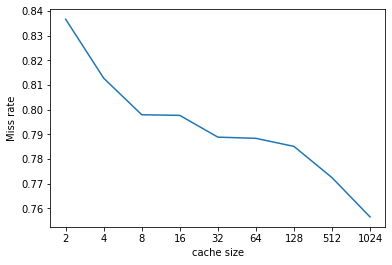

,cache size,Cache access,Read access,Write access,Cache miss,Miss rate,Read miss,Write miss,Compulsory miss
0,2,27030092,11541252,3894668,22613976,0.836622,9098763,2650575,2
1,4,27030092,11541252,3894668,21968438,0.812740,9098490,2650720,4
2,8,27030092,11541252,3894668,21568559,0.797946,8884222,2610530,8
3,16,27030092,11541252,3894668,21561638,0.797690,8190225,2430492,16
4,32,27030092,11541252,3894668,21323416,0.788877,7543652,2319412,32
5,64,27030092,11541252,3894668,21310191,0.788388,7503754,2295926,40
6,128,27030092,11541252,3894668,21222161,0.785131,7396277,2276384,44
7,512,27030092,11541252,3894668,20880318,0.772484,7289269,2257004,87
8,1024,27030092,11541252,3894668,20450023,0.756565,7289135,2256417,173


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
cache_size_array = [2,4,8,16,32,64,128,512,1024]
cache_access = [instruction_cache_access[i]+data_cache_access[i] for i in range(len(cache_size_array))]
cache_miss = [instruction_miss[i]+data_miss[i] for i in range(len(cache_size_array))]
miss_rate = [(instruction_miss[i]+data_miss[i])/cache_access[i] for i in range(len(cache_size_array))]
comp_miss = [instruction_compulsory_miss[i]+ data_compulsory_miss[i]  for i in range(len(cache_size_array)) ]
block_size_array = [1]*len(cache_size_array)
dic = {'cache size' : cache_size_array, 
       'Cache access' : cache_access, 
       "Read access" : read_access , 
       "Write access" : write_access , 
       "Cache miss": cache_miss,
       'Miss rate' : miss_rate,
       'Read miss' : read_miss,
       'Write miss' : write_miss,
       'Compulsory miss' : comp_miss,
       } 
df = pd.DataFrame(dic)
default_x_ticks = range(len(cache_size_array))
plt.plot(default_x_ticks,miss_rate)
plt.xticks(default_x_ticks, cache_size_array)

plt.xlabel('cache size')

plt.ylabel('Miss rate')
plt.show()
df


## 4-Way Set Associative Mapping for Instruction Cache

In [ ]:

import random 
import math

def hextoBin(hex): #for 32 bit address 
        """
        :param hex: type string
        :return: binary number of type string
        """
        if hex[:2] == "0x":
            return bin(int(hex, 0))[2:].zfill(32)
        else:
            return bin(int(hex, 16))[2:].zfill(32)


def fourway_Set_Associative(lines,cache_size,block_size):

  count = 0
  compulsory_miss = 0
  miss = 0
  hit = 0
  cache = {}
  cache_size = cache_size #KB
  Block_size = block_size #words
  associativiy = 4 #4 way
  word_size = 32
  sets=int(cache_size*1024/(Block_size*4*associativiy))
  index_size = int(math.log2(sets))
  offset_size=int(math.log2(Block_size))
  tag_size=word_size-index_size-offset_size
  cache_index=int(2**index_size)

  for i in range(cache_index):
    cache[i] = ['0','0','0','0'] ##Cache is declared as a dictionary here. Initially, the valid bits are zero and tag bits are empty
  

  for line in lines: ##Total cache memory is 256KB, and each block is 4B, and it is a 4-way set associative cache. so there are 16384 sets/lines in the cache 
    str_ = line 
    count += 1
    line = line.rstrip('\n')
    line = line.split(" ")
    address = line[1] 

    

    address_bits = hextoBin(address)
    offset_bits = address_bits[word_size-offset_size:word_size]
    index_bits = address_bits[word_size-offset_size-index_size:word_size-offset_size]    #Now since the number of sets in the cache is 16384 = 2^14, so the index bit becomes 14 bits wide                                    
    tag_bits = address_bits[word_size-offset_size-index_size-tag_size:word_size-index_size-offset_size] #And the remaining bits, i.e., 16 bits becomes the tag bits
    index = int(index_bits,2)   

                            
    if (cache[index][0][0] == '0' and cache[index][1][0] == '0' and cache[index][2][0] == '0' and cache[index][3][0] == '0'):
      miss += 1
      compulsory_miss += 1
      place = random.choice([0, 1, 2, 3])
      cache[index][place]="1"+tag_bits
      

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '0' and cache[index][2][0] == '0' and cache[index][3][0] == '0'): 
      if(cache[index][0][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([1, 2, 3])                                                                             
        cache[index][place] = "1" + tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '0' and cache[index][1][0] == '1' and cache[index][2][0] == '0' and cache[index][3][0] == '0'):
      if (cache[index][1][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0,2,3])
        cache[index][place] = "1"+ tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '0' and cache[index][1][0] == '0' and cache[index][2][0] == '1' and cache[index][3][0] == '0'):
      if(cache[index][2][1:] == tag_bits):
        hit +=1
      else:
        place = random.choice([0,1,3])
        cache[index][place] = "1" + tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '0' and cache[index][1][0] == '0' and cache[index][2][0] == '0' and cache[index][3][0] == '1'):
      if(cache[index][3][1:] == tag_bits):
        hit +=1
      else:
        place = random.choice([0,1,2])
        cache[index][place] = "1" + tag_bits
        miss += 1
        compulsory_miss += 1
  

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '1' and cache[index][2][0] == '0' and cache[index][3][0] == '0'):
      if(cache[index][0][1:] == tag_bits or cache[index][1][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([2, 3]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '1' and cache[index][1][0] == '0' and cache[index][2][0] == '1' and cache[index][3][0] == '0'):
      if(cache[index][0][1:] == tag_bits or cache[index][2][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([1, 3]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '1' and cache[index][1][0] == '0' and cache[index][2][0] == '0' and cache[index][3][0] == '1'):
      if(cache[index][0][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([1, 2]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '0' and cache[index][1][0] == '1' and cache[index][2][0] == '1' and cache[index][3][0] == '0'):
      if(cache[index][1][1:] == tag_bits or cache[index][2][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0, 3]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '0' and cache[index][1][0] == '1' and cache[index][2][0] == '0' and cache[index][3][0] == '1'):
      if(cache[index][1][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0, 2]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '0' and cache[index][1][0] == '0' and cache[index][2][0] == '1' and cache[index][3][0] == '1'):
      if(cache[index][2][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0, 1]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '1' and cache[index][1][0] == '1' and cache[index][2][0] == '1' and cache[index][3][0] == '0'):
      if(cache[index][0][1:] == tag_bits or cache[index][1][1:] == tag_bits or cache[index][2][1:] == tag_bits):
        hit += 1
      else:
        place = 3
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '1' and cache[index][1][0] == '1' and cache[index][2][0] == '0' and cache[index][3][0] == '1'):
      if(cache[index][0][1:] == tag_bits or cache[index][1][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = 2
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '0' and cache[index][2][0] == '1' and cache[index][3][0] == '1'):
      if(cache[index][0][1:] == tag_bits or cache[index][2][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = 1
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '0' and cache[index][1][0] == '1' and cache[index][2][0] == '1' and cache[index][3][0] == '1'):
      if(cache[index][1][1:] == tag_bits or cache[index][2][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = 0
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1


    elif (cache[index][0][0] == '1' and cache[index][1][0] == '1' and cache[index][2][0] == '1' and cache[index][3][0] == '1'):
      if(cache[index][0][1:] == tag_bits or cache[index][1][1:] == tag_bits or cache[index][2][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0,1,2,3])
        miss += 1
        cache[index][place] = "1"+tag_bits
  

  
  #for i in range(65536):                                           #Emptying the cache contents
    #    cache[i] = '0'
  return hit, miss, hit/count, miss/count, count, compulsory_miss
  

if __name__ == '__main__':
  print("hold on! guys its running, the  trace file is little big..........")
  getfile = open('/content/drive/MyDrive/traces /SIMPLE1.PRG', 'r')                                    
  lines = getfile.readlines()
  zero = [] #for information fetech (read access)
  two_three = [] # read access and write access
 
  for i in range(len(lines)):
     if lines[i][0] == '0':
       zero.append(lines[i])
     #if lines[i][0] == '2' or lines[i][0] == '3':
      #two_three.append(lines[i])

  cache_size_array = [2,4,8,16,32,64,128,512,1024]
  block_size_array = [1]
  i_hit = []
  i_miss = []
  i_compulsory_miss = []
  miss_rate = []
  hit_rate = []
  i_cache_access = []

  for c in cache_size_array:
      for b in block_size_array:
          hit23, miss23, hitrate, missrate, count23, compulsory_miss23 =  fourway_Set_Associative(zero,c,b)
          i_hit.append(hit23)
          i_miss.append(miss23)
          i_compulsory_miss.append(compulsory_miss23)
          miss_rate.append(missrate)
          hit_rate.append(hitrate)
          i_cache_access.append(count23)
          """
          print('*'*50)
          print("cache size : {}".format(c),end=' ')
          print("Block size : {}".format(b))
          print("hits : ", hit23)
          print("misses : ", miss23)
          print("Hit rate : ", hitrate)
          print("Miss rate : ", missrate)
          print("Cache access : ", count23)
          print('Compulsory misses : ', compulsory_miss23)
          print('*'*50)"""


getfile.close()
"""  
print("Running simulator now!...")
hit23, miss23, hitrate, missrate, count23 ,count_read23 , count_write23, compulsory_miss23 =  fourway_Set_Associative(two_three)
print('*'*50)
print("hits : ", hit23)
print("misses : ", miss23)
print("Compulsory misses : ", compulsory_miss23)
print("Hit rate : ", hitrate)
print("Miss rate : ", missrate)
print("Total data : ", count23)
print("Number of read access : ",count_read23)
print("Number of write access : ",count_write23)
print('*'*50) """

hold on! guys its running, the  trace file is little big..........


'  \nprint("Running simulator now!...")\nhit23, miss23, hitrate, missrate, count23 ,count_read23 , count_write23, compulsory_miss23 =  fourway_Set_Associative(two_three)\nprint(\'*\'*50)\nprint("hits : ", hit23)\nprint("misses : ", miss23)\nprint("Compulsory misses : ", compulsory_miss23)\nprint("Hit rate : ", hitrate)\nprint("Miss rate : ", missrate)\nprint("Total data : ", count23)\nprint("Number of read access : ",count_read23)\nprint("Number of write access : ",count_write23)\nprint(\'*\'*50) '

## 4-Way Set Associative Mapping for Data Cache

In [ ]:
#read amd write
import random 
import math

def hextoBin(hex): #for 32 bit address
        """
        :param hex: type string
        :return: binary number of type string
        """
        if hex[:2] == "0x":
            return bin(int(hex, 0))[2:].zfill(32)
        else:
            return bin(int(hex, 16))[2:].zfill(32)


def fourway_Set_Associative(lines,cache_size,block_size):

  count = 0
  count_read = 0
  count_write = 0
  compulsory_miss = 0
  miss = 0
  read_miss = 0
  write_miss = 0
  hit = 0
  cache = {}
  storing = {}
  status_bit = {}
  text_file = [] #for dirty file generation

  cache_size = cache_size #KB
  Block_size = block_size #words
  associativiy = 4 #4 way
  word_size = 32
  sets=int(cache_size*1024/(Block_size*4*associativiy))
  index_size = int(math.log2(sets))
  offset_size=int(math.log2(Block_size))
  tag_size=word_size-index_size-offset_size
  cache_index=int(2**index_size)

  for i in range(cache_index):
    storing[i] = ['','','','']    #for storing and replacing it to dirty file

  for i in range(cache_index):
    status_bit[i] = ['','','','']  #for assigning status

  for i in range(cache_index):
    cache[i] = ['0','0','0','0'] ##Cache is declared as a dictionary here. Initially, the valid bits are zero and tag bits are empty
  

  for line in lines: ##Total cache memory is 256KB, and each block is 4B, and it is a 4-way set associative cache. so there are 16384 sets/lines in the cache 
    str_ = line 
    count += 1
    line = line.rstrip('\n')
    line = line.split(" ")
    address = line[1]     
    status_indicator = line[0]

    if status_indicator == '3':
      count_write += 1
    else:
      count_read += 1

    

    address_bits = hextoBin(address)
    offset_bits = address_bits[word_size-offset_size:word_size]
    index_bits = address_bits[word_size-offset_size-index_size:word_size-offset_size]    #Now since the number of sets in the cache is 16384 = 2^14, so the index bit becomes 14 bits wide                                    
    tag_bits = address_bits[word_size-offset_size-index_size-tag_size:word_size-index_size-offset_size] #And the remaining bits, i.e., 16 bits becomes the tag bits
    index = int(index_bits,2)   




                            
    if (cache[index][0][0] == '0' and cache[index][1][0] == '0' and cache[index][2][0] == '0' and cache[index][3][0] == '0'):
      miss += 1
      compulsory_miss += 1
      place = random.choice([0, 1, 2, 3])
      cache[index][place]="1"+tag_bits
      if status_indicator == "3":
        status_bit[index][place] = '1'
        storing[index][place] = str_
        write_miss += 1
      else:
        status_bit[index][place] = '0'
        read_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '0' and cache[index][2][0] == '0' and cache[index][3][0] == '0'): 
      if(cache[index][0][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([1, 2, 3])                                                                             
        cache[index][place] = "1" + tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1
    elif (cache[index][0][0] == '0' and cache[index][1][0] == '1' and cache[index][2][0] == '0' and cache[index][3][0] == '0'):
      if (cache[index][1][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0,2,3])
        cache[index][place] = "1"+ tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '0' and cache[index][1][0] == '0' and cache[index][2][0] == '1' and cache[index][3][0] == '0'):
      if(cache[index][2][1:] == tag_bits):
        hit +=1
      else:
        place = random.choice([0,1,3])
        cache[index][place] = "1" + tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '0' and cache[index][1][0] == '0' and cache[index][2][0] == '0' and cache[index][3][0] == '1'):
      if(cache[index][3][1:] == tag_bits):
        hit +=1
      else:
        place = random.choice([0,1,2])
        cache[index][place] = "1" + tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '1' and cache[index][2][0] == '0' and cache[index][3][0] == '0'):
      if(cache[index][0][1:] == tag_bits or cache[index][1][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([2, 3]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '0' and cache[index][2][0] == '1' and cache[index][3][0] == '0'):
      if(cache[index][0][1:] == tag_bits or cache[index][2][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([1, 3]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '0' and cache[index][2][0] == '0' and cache[index][3][0] == '1'):
      if(cache[index][0][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([1, 2]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '0' and cache[index][1][0] == '1' and cache[index][2][0] == '1' and cache[index][3][0] == '0'):
      if(cache[index][1][1:] == tag_bits or cache[index][2][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0, 3]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '0' and cache[index][1][0] == '1' and cache[index][2][0] == '0' and cache[index][3][0] == '1'):
      if(cache[index][1][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0, 2]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '0' and cache[index][1][0] == '0' and cache[index][2][0] == '1' and cache[index][3][0] == '1'):
      if(cache[index][2][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0, 1]) 
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '1' and cache[index][2][0] == '1' and cache[index][3][0] == '0'):
      if(cache[index][0][1:] == tag_bits or cache[index][1][1:] == tag_bits or cache[index][2][1:] == tag_bits):
        hit += 1
      else:
        place = 3
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '1' and cache[index][2][0] == '0' and cache[index][3][0] == '1'):
      if(cache[index][0][1:] == tag_bits or cache[index][1][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = 2
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '0' and cache[index][2][0] == '1' and cache[index][3][0] == '1'):
      if(cache[index][0][1:] == tag_bits or cache[index][2][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = 1
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '0' and cache[index][1][0] == '1' and cache[index][2][0] == '1' and cache[index][3][0] == '1'):
      if(cache[index][1][1:] == tag_bits or cache[index][2][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = 0
        cache[index][place] = "1"+tag_bits
        miss += 1
        compulsory_miss += 1
        if status_indicator == "3":
          status_bit[index][place] = '1'
          storing[index][place] = str_
          write_miss += 1
        else:
          status_bit[index][place] = '0'
          read_miss += 1

    elif (cache[index][0][0] == '1' and cache[index][1][0] == '1' and cache[index][2][0] == '1' and cache[index][3][0] == '1'):
      if(cache[index][0][1:] == tag_bits or cache[index][1][1:] == tag_bits or cache[index][2][1:] == tag_bits or cache[index][3][1:] == tag_bits):
        hit += 1
      else:
        place = random.choice([0,1,2,3])
        miss += 1
        if status_bit[index][place] == '1':
          text_file.append(storing[index][place])
        if status_indicator == '3':
            status_bit[index][place] = '1'
            write_miss += 1
        else:
            status_bit[index][place] = '0'
            read_miss += 1
        cache[index][place] = "1"+tag_bits
  
  textfile = open('/content/drive/MyDrive/Dirty_file_SA_sample1/dirty_4set_{}_{}.txt'.format(cache_size,Block_size),'w')
  for ele in text_file:
    textfile.write(ele+"\n")
  
  #for i in range(65536):                                           #Emptying the cache contents
    #    cache[i] = '0'
  return hit, miss, hit/count, miss/count, count ,count_read , count_write, compulsory_miss, write_miss , read_miss
  

if __name__ == '__main__':
  print("hold on! guys its running, the  trace file is little big..........")
  getfile = open('/content/drive/MyDrive/traces /SIMPLE1.PRG', 'r')                                     
  lines = getfile.readlines()
  #zero = [] #for information fetech (read access)
  two_three = [] # read access and write access
 
  for i in range(len(lines)):
    #if lines[i][0] == '0':
      #zero.append(lines[i])
    if lines[i][0] == '2' or lines[i][0] == '3':
      two_three.append(lines[i])

  cache_size_array = [2,4,8,16,32,64,128,512,1024]
  block_size_array = [1]
  d_hit = []
  d_miss = []
  d_compulsory_miss = []
  miss_rate = []
  hit_rate = []
  read_access = []
  write_access = []
  d_cache_access = []
  read_miss = []
  write_miss = []
  for c in cache_size_array:
      for b in block_size_array:
        hit23, miss23, hitrate, missrate, count23 ,count_read23 , count_write23, compulsory_miss23, write_miss23, read_miss23 =  fourway_Set_Associative(two_three,c,b)
        d_hit.append(hit23)
        d_miss.append(miss23)
        d_compulsory_miss.append(compulsory_miss23)
        miss_rate.append(missrate)
        hit_rate.append(hitrate)
        read_access.append(count_read23)
        write_access.append(count_write23)
        read_miss.append(read_miss23)
        write_miss.append(write_miss23)
        d_cache_access.append(count23)
        """
        print('*'*50)
        print("cache size : {}".format(c),end=' ')
        print("Block size : {}".format(b))
        print("hits : ", hit23)
        print("misses : ", miss23)
        print("Hit rate : ", hitrate)
        print("Miss rate : ", missrate)
        print("Cache access : ", count23)
        print("Number of read access : ",count_read23)
        print("Number of write access : ",count_write23)
        print('Compulsory misses : ', compulsory_miss23)
        print('Read misses : ', read_miss23)
        print('Write misses : ', write_miss23)
        print('*'*50)"""

  
  getfile.close()
  """  
  print("Running simulator now!...")
  hit23, miss23, hitrate, missrate, count23 ,count_read23 , count_write23, compulsory_miss23 =  fourway_Set_Associative(two_three)
  print('*'*50)
  print("hits : ", hit23)
  print("misses : ", miss23)
  print("Compulsory misses : ", compulsory_miss23)
  print("Hit rate : ", hitrate)
  print("Miss rate : ", missrate)
  print("Total data : ", count23)
  print("Number of read access : ",count_read23)
  print("Number of write access : ",count_write23)
  print('*'*50) """

hold on! guys its running, the  trace file is little big..........


## Parameter for 4-Way Set Associative

In [ ]:
cache_size_array = [2,4,8,16,32,64,128,512,1024]
block_size_array = [1]
with open('/content/drive/MyDrive/Dirty_file_SA_sample1/4_Way_set_associative_result.txt','w') as f:
  for i in range(len(cache_size_array)):
    f.write("*"*50)
    f.write("\nFor cache size : {} KB and block size : {} word".format(cache_size_array[i],block_size_array[0]))
    f.write("\nCache access : {}".format(i_cache_access[i]+d_cache_access[i]))
    f.write('\nRead access : {}'.format(read_access[i]))
    f.write("\nWrite access : {}".format(write_access[i]))
    f.write("C\nache miss : {}".format(i_miss[i]+d_miss[i]))
    f.write("\nRead misses : {}".format(read_miss[i]))
    f.write("\nWrite misses : {}".format(write_miss[i]))
    f.write("\nCompulsory misses : {}".format(i_compulsory_miss[i]+ d_compulsory_miss[i]))
    f.write("\n")


## Results and Graph

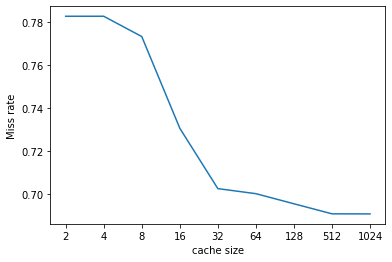

,cache size,Cache access,Read access,Write access,Cache miss,Miss rate,Read miss,Write miss,Compulsory miss
0,2,27030092,11541252,3894668,21152782,0.782564,9098763,2650575,8
1,4,27030092,11541252,3894668,21153047,0.782574,9098490,2650720,8
2,8,27030092,11541252,3894668,20897800,0.773131,8884222,2610530,12
3,16,27030092,11541252,3894668,19745337,0.730495,8190225,2430492,24
4,32,27030092,11541252,3894668,18986813,0.702432,7543652,2319412,40
5,64,27030092,11541252,3894668,18923120,0.700076,7503754,2295926,72
6,128,27030092,11541252,3894668,18796242,0.695382,7396277,2276384,136
7,512,27030092,11541252,3894668,18669877,0.690707,7289269,2257004,181
8,1024,27030092,11541252,3894668,18668775,0.690666,7289135,2256417,181


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
cache_size_array = [2,4,8,16,32,64,128,512,1024]
cache_access = [i_cache_access[i]+d_cache_access[i] for i in range(len(cache_size_array))]
cache_miss = [i_miss[i]+d_miss[i] for i in range(len(cache_size_array))]
miss_rate = [(i_miss[i]+d_miss[i])/cache_access[i] for i in range(len(cache_size_array))]
comp_miss = [i_compulsory_miss[i]+ d_compulsory_miss[i]  for i in range(len(cache_size_array)) ]
block_size_array = [1]*len(cache_size_array)
dic = {'cache size' : cache_size_array, 
       'Cache access' : cache_access, 
       "Read access" : read_access , 
       "Write access" : write_access , 
       "Cache miss": cache_miss,
       'Miss rate' : miss_rate,
       'Read miss' : read_miss,
       'Write miss' : write_miss,
       'Compulsory miss' : comp_miss,
       } 
df = pd.DataFrame(dic)
df = pd.DataFrame(dic)
default_x_ticks = range(len(cache_size_array))
plt.plot(default_x_ticks,miss_rate)
plt.xticks(default_x_ticks, cache_size_array)

plt.xlabel('cache size')

plt.ylabel('Miss rate')
plt.show()
print('')
df

